In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing
from statsmodels.formula.api import glm
import statsmodels.api as sm
from scipy.stats import chisquare
import re
from IPython.display import Image

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
warnings.simplefilter('ignore')

# 14.1.a

`Formulating a model that makes substantive sense in the context of the data set - for example, constructing dummy regressors to represent factors and including interaction regressors where these are appropriate - fit a linear logistic regression of the response variable on the explanatory variables, reporting the estimated regression coefficients and their asymptotic standard errors.`

# Chile Data

In [3]:
#Download Dataset
data_chile = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Chile.txt',sep = '\t')
data_chile

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2698,M,15000,F,44.0,P,75000.0,1.42045,Y
2699,M,15000,M,21.0,S,75000.0,0.18315,NaN


In [4]:
#Limit our dataframe to only those voters who have given Yes or No

binary_votes = ['Y','N']

data_chile1 = data_chile[data_chile['vote'].isin(binary_votes)]
data_chile1

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2692,M,15000,F,21.0,S,35000.0,1.22231,Y
2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2698,M,15000,F,44.0,P,75000.0,1.42045,Y


In [5]:
data_chile1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 1 to 2700
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      1757 non-null   object 
 1   population  1757 non-null   int64  
 2   sex         1757 non-null   object 
 3   age         1757 non-null   float64
 4   education   1750 non-null   object 
 5   income      1710 non-null   float64
 6   statusquo   1754 non-null   float64
 7   vote        1757 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 123.5+ KB


In [6]:
#Drop all the Null Values so we can proceed with analysis
data_chile1.dropna(inplace=True)

`constructing dummy regressors to represent factors`

In [7]:
dummmy_cols = data_chile1[['region','sex','education']] #columns we will turn into dummy variables 0,1,2, etc

for i in dummmy_cols:
    data_chile1 = pd.get_dummies(data_chile1, columns=[i]) #get dummy variables

data_chile1['vote'] = preprocessing.LabelEncoder().fit_transform(data_chile1['vote']) 

#Now we view dataframe with lablel encoded with dummy variables
data_chile1

,population,age,income,statusquo,vote,region_C,region_M,region_N,region_S,region_SA,sex_F,sex_M,education_P,education_PS,education_S
1,175000,65.0,35000.0,1.00820,1,0,0,1,0,0,0,1,1,0,0
2,175000,29.0,7500.0,-1.29617,0,0,0,1,0,0,0,1,0,1,0
3,175000,38.0,15000.0,1.23072,1,0,0,1,0,0,1,0,1,0,0
4,175000,49.0,35000.0,-1.03163,0,0,0,1,0,0,1,0,1,0,0
5,175000,23.0,35000.0,-1.10496,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,15000,21.0,35000.0,1.22231,1,0,1,0,0,0,1,0,0,0,1
2696,15000,42.0,15000.0,-1.26247,0,0,1,0,0,0,0,1,1,0,0
2697,15000,28.0,15000.0,1.32950,1,0,1,0,0,0,1,0,1,0,0
2698,15000,44.0,75000.0,1.42045,1,0,1,0,0,0,1,0,1,0,0


In [8]:
#Columns of DataFrame with Dummy Variables
data_chile1.columns

Index(['population', 'age', 'income', 'statusquo', 'vote', 'region_C',
       'region_M', 'region_N', 'region_S', 'region_SA', 'sex_F', 'sex_M',
       'education_P', 'education_PS', 'education_S'],
      dtype='object')

In [9]:
#Run a GLM 

cols = "+".join(data_chile1.columns.drop('vote'))
formula = "vote~" + cols
llr1 = glm(formula=formula, data=data_chile1, family=sm.families.Binomial()).fit()
llr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                            GLM   Df Residuals:                     1691
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -351.74
Date:                Mon, 19 Jul 2021   Deviance:                       703.48
Time:                        22:01:36   Pearson chi2:                 1.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1127      0.177      0.636      0.525      -0.235       0.460
population    1.276e-06   1.41e-06      0.902      0.367    -1.5e-06    4.05e-06
age              0.0007      0.007      0.095      0.924      -0.014       0.015
income       -2.972e-06   2.86e-06     -1.041      0.298   -8.57e-06    2.63e-06
statusquo        3.2288      0.152     21.184      0.000       2.930       3.528
region_C         0.0222      0.221      0.100      0.920      -0.411       0.455
region_M         0.7294      0.472      1.546      0.122      -0.195       1.654
region_N        -0.0774      0.260     -0.298      0.765      -0.586       0.431
region_S        -0.2823      0.199     -1.417      0.157      -0.673       0.108
region_SA       -0.2790      0.271     -1.030      0.303      -0.810       0.252
sex_F            0.3321      0.141      2.350      0.019       0.055       0.609
sex_M           -0.2194      0.129     -1.705      0.088      -0.472       0.033
education_P      0.5793      0.182      3.186      0.001       0.223       0.936
education_PS    -0.3883      0.221     -1.761      0.078      -0.821       0.044
education_S     -0.0782      0.142     -0.551      0.581      -0.356       0.200
================================================================================
"""

In [10]:
#Which features are significant?

model_1_sigfeatures = llr1.pvalues[llr1.pvalues < 0.05]
model_1_sigfeatures

statusquo      1.345298e-99
sex_F          1.878561e-02
education_P    1.443075e-03
dtype: float64

We can see that signiifcant regressors are Statusquo, Sex_F, education_P

In [11]:
#Refit Model with ONLY SIGNIFICANT REGRESSORS identified above

cols = "+".join(model_1_sigfeatures.index)
formula = "vote~" + cols
llr2 = glm(formula=formula, data=data_chile1, family=sm.families.Binomial()).fit()
llr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                            GLM   Df Residuals:                     1699
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -355.23
Date:                Mon, 19 Jul 2021   Deviance:                       710.46
Time:                        22:01:36   Pearson chi2:                 1.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3708      0.157     -2.363      0.018      -0.678      -0.063
statusquo       3.1726      0.145     21.896      0.000       2.889       3.457
sex_F           0.5842      0.202      2.896      0.004       0.189       0.979
education_P     0.8074      0.206      3.917      0.000       0.403       1.211
===============================================================================
"""

In [12]:
#From this model, are all features identified significant?

model_2_sigfeatures = llr2.pvalues[llr2.pvalues < 0.05]
model_2_sigfeatures

Intercept       1.814519e-02
statusquo      2.815010e-106
sex_F           3.774409e-03
education_P     8.965870e-05
dtype: float64

We can see that signiifcant regressors are Statusquo, Sex_F, education_P and the intercept. Like previous model.

In [13]:
#Fitting now to a Simplier model with only the Intercept

llr3 = glm(formula='vote~1', data=data_chile1, family=sm.families.Binomial()).fit()
llr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                            GLM   Df Residuals:                     1702
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1180.1
Date:                Mon, 19 Jul 2021   Deviance:                       2360.3
Time:                        22:01:36   Pearson chi2:                 1.70e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0364      0.048     -0.751      0.453      -0.131       0.059
==============================================================================
"""

In [14]:
#From this model, are all features identified significant?

model_3_sigfeatures = llr3.pvalues[llr3.pvalues < 0.05]
model_3_sigfeatures

Series([], dtype: float64)

In [15]:
#Comparision of Models using Deviances
print('The Deviance of the Model with all significant regressors = {}'.format(llr2.deviance))
print('This model has {} Degrees of freedom'.format(llr2.df_resid))
print('\nThe Deviance of the Model with only the Intercept as a regressor = {}'.format(llr3.deviance))
print('This model has {} Degrees of freedom'.format(llr3.df_resid))
print('\nThe Difference in Deviances is {}'.format(llr3.deviance-llr2.deviance))
print('The Difference in Degrees of Freedom is {}'.format(llr3.df_resid-llr2.df_resid))

The Deviance of the Model with all significant regressors = 710.4587194318254
This model has 1699 Degrees of freedom

The Deviance of the Model with only the Intercept as a regressor = 2360.2949675220357
This model has 1702 Degrees of freedom

The Difference in Deviances is 1649.8362480902101
The Difference in Degrees of Freedom is 3


In [16]:
#Check if this is significant pvalues using Chisquared

chisquare([1649.84], ddof=3)

Power_divergenceResult(statistic=0.0, pvalue=nan)

This is well below .001 and hence significant according to Chi-Squared CDF

# Titanic Data

In [17]:
#Data for Titanic

data_titanic = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Titanic.txt',sep='\t',names=['name','survived','age','Class','sex'])[1:]
data_titanic = data_titanic.drop('name',axis=1)
data_titanic

,survived,age,Class,sex
1,yes,29,1st,female
2,no,2,1st,female
3,no,30,1st,male
4,no,25,1st,female
5,yes,0.9167,1st,male
...,...,...,...,...
1309,no,NaN,3rd,male
1310,no,NaN,3rd,male
1311,no,NaN,3rd,male
1312,no,NaN,3rd,female


In [18]:
#Data Cleaning 

data_titanic['age'] = pd.to_numeric(data_titanic['age'])
data_titanic.dropna(inplace=True)
print('Number of Data points {}'.format(len(data_titanic)))
print('')
print(data_titanic.isnull().sum())
print('')
print(data_titanic.info())

Number of Data points 633

survived    0
age         0
Class       0
sex         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 1 to 839
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  633 non-null    object 
 1   age       633 non-null    float64
 2   Class     633 non-null    object 
 3   sex       633 non-null    object 
dtypes: float64(1), object(3)
memory usage: 24.7+ KB
None


In [19]:
#Cast to dataframe with Dummy Regressors

#create binary classifier for our response variable
data_titanic['survived'] = np.where(data_titanic['survived']=='yes', 1, 0)

features = data_titanic.select_dtypes(include=['object']).columns 
for i in features:
    data_titanic = pd.get_dummies(data_titanic, columns=[i])
data_titanic

,survived,age,Class_1st,Class_2nd,Class_3rd,sex_female,sex_male
1,1,29.0000,1,0,0,1,0
2,0,2.0000,1,0,0,1,0
3,0,30.0000,1,0,0,0,1
4,0,25.0000,1,0,0,1,0
5,1,0.9167,1,0,0,0,1
...,...,...,...,...,...,...,...
834,0,32.0000,0,0,1,0,1
836,0,20.0000,0,0,1,0,1
837,0,37.0000,0,0,1,0,1
838,0,28.0000,0,0,1,0,1


In [20]:
cols = "+".join(data_titanic.columns.drop('survived'))
formula = "survived~" + cols
llr4 = glm(formula=formula, data=data_titanic, family=sm.families.Binomial()).fit()
llr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                            GLM   Df Residuals:                      628
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.86
Date:                Mon, 19 Jul 2021   Deviance:                       539.71
Time:                        22:01:36   Pearson chi2:                     726.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8363      0.159      5.246      0.000       0.524       1.149
age           -0.0493      0.009     -5.647      0.000      -0.066      -0.032
Class_1st      1.7243      0.215      8.021      0.000       1.303       2.146
Class_2nd      0.2291      0.153      1.494      0.135      -0.071       0.529
Class_3rd     -1.1170      0.177     -6.299      0.000      -1.465      -0.769
sex_female     1.9615      0.163     12.036      0.000       1.642       2.281
sex_male      -1.1252      0.123     -9.125      0.000      -1.367      -0.883
==============================================================================
"""

In [21]:
#Which features are significant?

model_4_sigfeatures = llr4.pvalues[llr4.pvalues < 0.05]
model_4_sigfeatures

Intercept     1.553868e-07
age           1.633840e-08
Class_1st     1.050319e-15
Class_3rd     3.004940e-10
sex_female    2.291799e-33
sex_male      7.177542e-20
dtype: float64

Basically everything but second class determined if you survived on the Titanic. 

In [22]:
#Create model with only significant features identified

cols = "+".join(model_4_sigfeatures.index.drop('Intercept'))
formula = "survived~" + cols
llr5 = glm(formula=formula, data=data_titanic, family=sm.families.Binomial()).fit()
llr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                            GLM   Df Residuals:                      628
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.86
Date:                Mon, 19 Jul 2021   Deviance:                       539.71
Time:                        22:01:37   Pearson chi2:                     726.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9891      0.204      4.856      0.000       0.590       1.388
age           -0.0493      0.009     -5.647      0.000      -0.066      -0.032
Class_1st      1.4952      0.282      5.302      0.000       0.943       2.048
Class_3rd     -1.3460      0.289     -4.653      0.000      -1.913      -0.779
sex_female     2.0379      0.178     11.458      0.000       1.689       2.386
sex_male      -1.0488      0.135     -7.782      0.000      -1.313      -0.785
==============================================================================
"""

In [23]:
#Are all features indeed significant?

model_5_sigfeatures = llr5.pvalues[llr5.pvalues < 0.05]
model_5_sigfeatures

Intercept     1.196310e-06
age           1.633840e-08
Class_1st     1.142363e-07
Class_3rd     3.274126e-06
sex_female    2.137115e-30
sex_male      7.133016e-15
dtype: float64

In [24]:
#Fit to simple model with just intercept

llr6 = glm(formula='survived~1', data=data_titanic, family=sm.families.Binomial()).fit()
llr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                            GLM   Df Residuals:                      632
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.77
Date:                Mon, 19 Jul 2021   Deviance:                       869.54
Time:                        22:01:37   Pearson chi2:                     633.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2253      0.080     -2.816      0.005      -0.382      -0.068
==============================================================================
"""

In [25]:
#Is it significant?

model_6_sigfeatures = llr6.pvalues[llr6.pvalues < 0.05]
model_6_sigfeatures

Intercept    0.004862
dtype: float64

In [26]:
#Comparision of Models using Deviances
print('The Deviance of the Model with all significant regressors = {}'.format(llr5.deviance))
print('This model has {} Degrees of freedom'.format(llr5.df_resid))
print('\nThe Deviance of the Model with only the Intercept as a regressor = {}'.format(llr6.deviance))
print('This model has {} Degrees of freedom'.format(llr6.df_resid))
print('\nThe Difference in Deviances is {}'.format(llr6.deviance-llr5.deviance))
print('The Difference in Degrees of Freedom is {}'.format(llr6.df_resid-llr5.df_resid))

The Deviance of the Model with all significant regressors = 539.7149340933435
This model has 628 Degrees of freedom

The Deviance of the Model with only the Intercept as a regressor = 869.5438826479015
This model has 632 Degrees of freedom

The Difference in Deviances is 329.828948554558
The Difference in Degrees of Freedom is 4


This is well below the .001 chi-squared significance level 

# 15.1

In [27]:
data = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Long.txt')

arr = []
for i in range(len(data)):
    arr.append(re.sub('\s+',' ', str(data.iloc[i,].values[0])).split(' '))
data = pd.DataFrame(arr).iloc[:,2:].apply(pd.to_numeric, errors='ignore')
data.columns = ['fem','ment','phd','mar','kid5','art']
data

,fem,ment,phd,mar,kid5,art
0,0,8,1.38,1,2,3
1,0,7,4.29,0,0,0
2,0,47,3.85,0,0,4
3,0,19,3.59,1,1,1
4,0,0,1.81,1,0,1
...,...,...,...,...,...,...
910,1,0,2.12,1,0,1
911,1,5,3.75,0,0,2
912,1,0,0.76,0,0,0
913,1,7,2.25,0,0,1


In [28]:
print(data.describe())
print('')
print(data.info())

              fem        ment         phd         mar        kid5         art
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000
mean     0.460109    8.767213    3.103093    0.662295    0.495082    1.692896
std      0.498679    9.483916    0.984274    0.473186    0.764880    1.926069
min      0.000000    0.000000    0.760000    0.000000    0.000000    0.000000
25%      0.000000    3.000000    2.260000    0.000000    0.000000    0.000000
50%      0.000000    6.000000    3.150000    1.000000    0.000000    1.000000
75%      1.000000   12.000000    3.920000    1.000000    1.000000    2.000000
max      1.000000   77.000000    4.620000    1.000000    3.000000   19.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fem     915 non-null    int64  
 1   ment    915 non-null    int64  
 2   phd     915 non-null    float64
 3   mar

In [29]:
cols = data.columns 
cols

Index(['fem', 'ment', 'phd', 'mar', 'kid5', 'art'], dtype='object')

In [30]:
#Print the KDE plot of values

import matplotlib.pyplot as plt 
import seaborn as sns

for i in cols:    
    plt.figure(figsize=(10,4))  
    sns.kdeplot(data[i])

In [31]:
#Since the graph of art does not look static and is left skewed, let us use OLS summary
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x = sm.add_constant(x)
model = sm.OLS(y, x)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    art   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           2.28e-21
Time:                        22:01:39   Log-Likelihood:                -1844.1
No. Observations:                 915   AIC:                             3700.
Df Residuals:                     909   BIC:                             3729.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3343      0.241      5.538      0.0

In [32]:
#Which features/columns are significant?

significant_features = model_fit.pvalues[model_fit.pvalues < 0.05]
significant_features

const    3.994603e-08
fem      3.032285e-03
ment     9.342635e-20
kid5     1.395290e-03
dtype: float64

Here we have const, fem, ment and kid5 as significant regressors. But notice R^2 is terrible

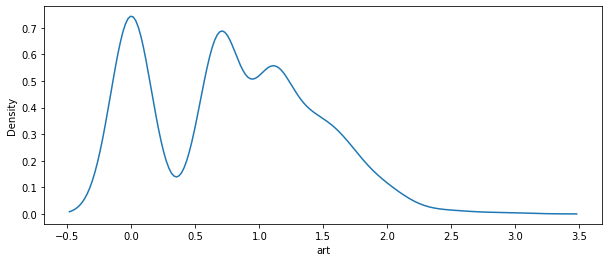

In [33]:
#Now transform the 'art' explanatory variable using log

data['art'] = np.log(1+data.art) #data begins at zero which we can't take log of so we add 1

#View new KDE plt of 'art' variable
plt.figure(figsize=(10,4))  
sns.kdeplot(data['art'])


In [34]:
#Re-run OLS model

x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x = sm.add_constant(x)
model = sm.OLS(y, x)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    art   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     21.31
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           3.42e-20
Time:                        22:01:39   Log-Likelihood:                -824.47
No. Observations:                 915   AIC:                             1661.
Df Residuals:                     909   BIC:                             1690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5970      0.079      7.553      0.0

In [35]:
#Which features are significant in new transformed dataset?

significant_features = model_fit.pvalues[model_fit.pvalues < 0.05]
significant_features

const    1.038901e-13
fem      1.355494e-02
ment     5.531453e-18
mar      4.345817e-02
kid5     9.935313e-04
dtype: float64

We can see that signiifcant regressors are const, dem, ment, mar, kid5. But R^2 is worse

In [36]:
#Now perform Poission GLM 

llr7 = glm('art~fem+ment+phd+mar+kid5', data=data, family=sm.families.Poisson()).fit()
llr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      909
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -942.07
Date:                Mon, 19 Jul 2021   Deviance:                       572.99
Time:                        22:01:39   Pearson chi2:                     431.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4853      0.151     -3.208      0.001      -0.782      -0.189
fem           -0.1316      0.080     -1.654      0.098      -0.287       0.024
ment           0.0189      0.003      5.854      0.000       0.013       0.025
phd            0.0314      0.039      0.804      0.421      -0.045       0.108
mar            0.1227      0.090      1.367      0.172      -0.053       0.299
kid5          -0.1321      0.058     -2.271      0.023      -0.246      -0.018
==============================================================================
"""

In [37]:
significant_features1 = llr7.pvalues[llr7.pvalues < 0.05]
significant_features1

Intercept    1.336221e-03
ment         4.805206e-09
kid5         2.312612e-02
dtype: float64

When using a Poission glm on our transformed data, the most important factor now ment and kid5- number of articles that you have published and whether you have kids. 

# 15.4

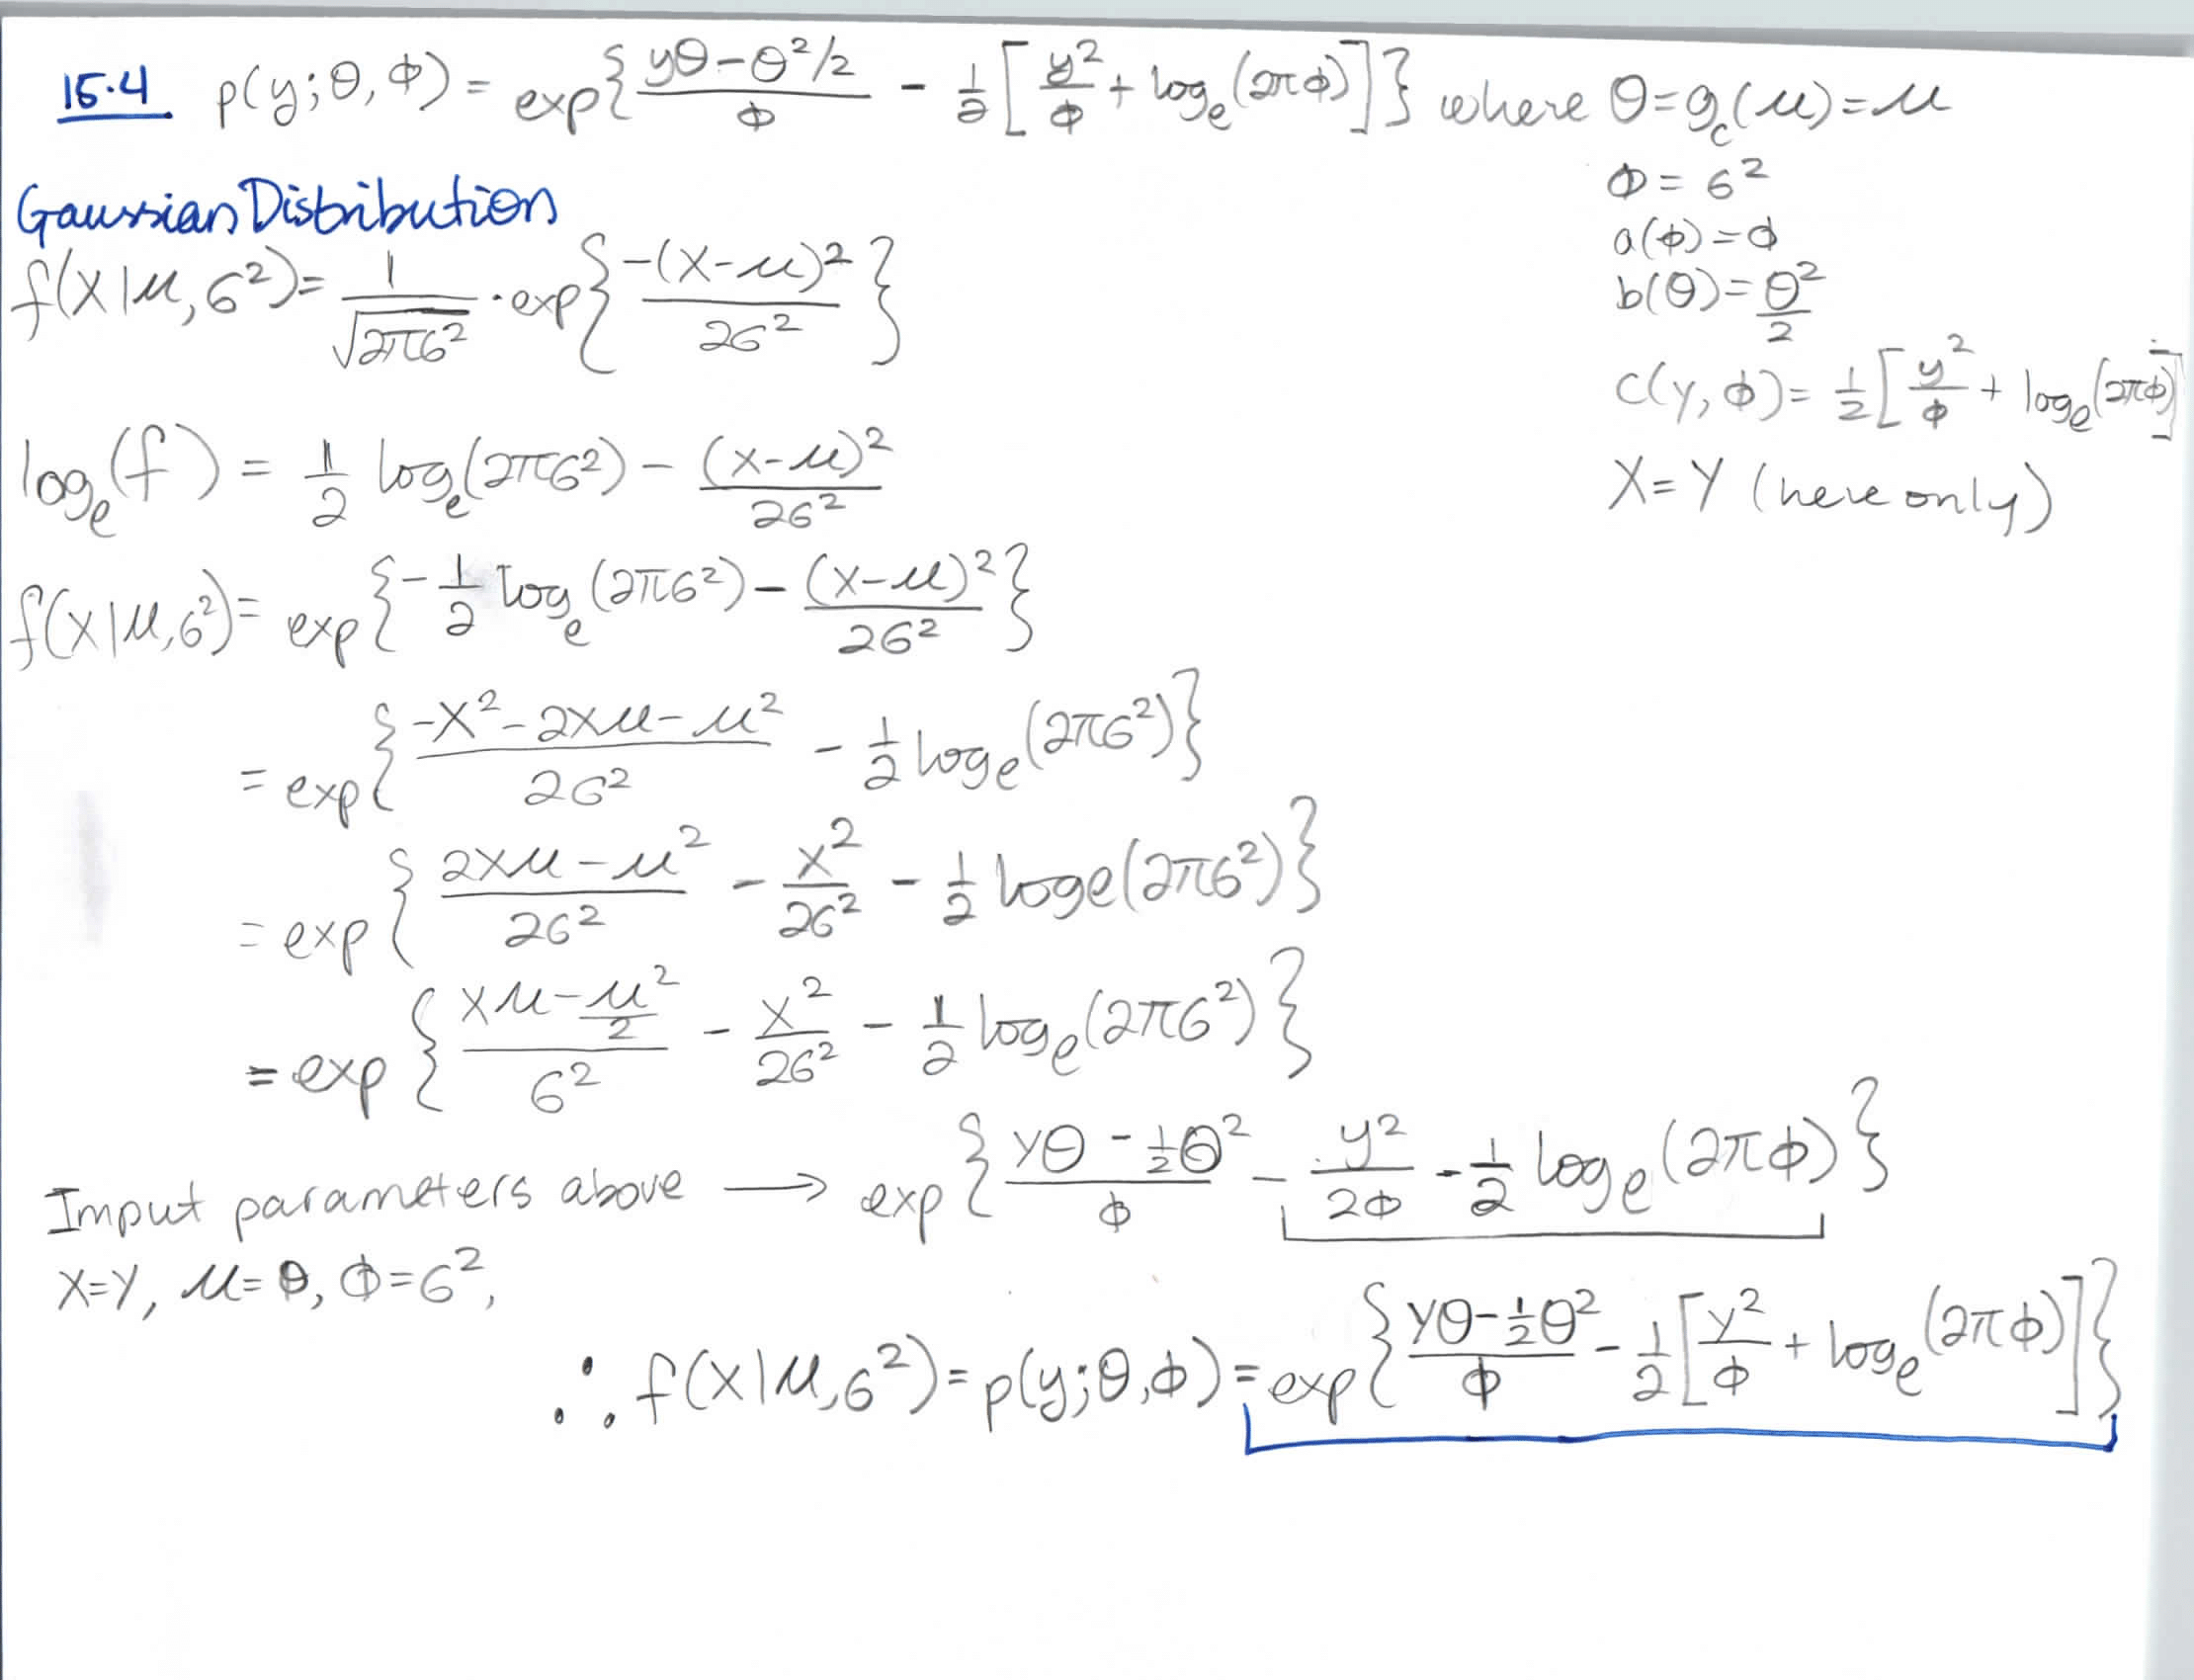

In [38]:
Image("4_20210719_0002-1.png", width=900, height=500)

# 15.5

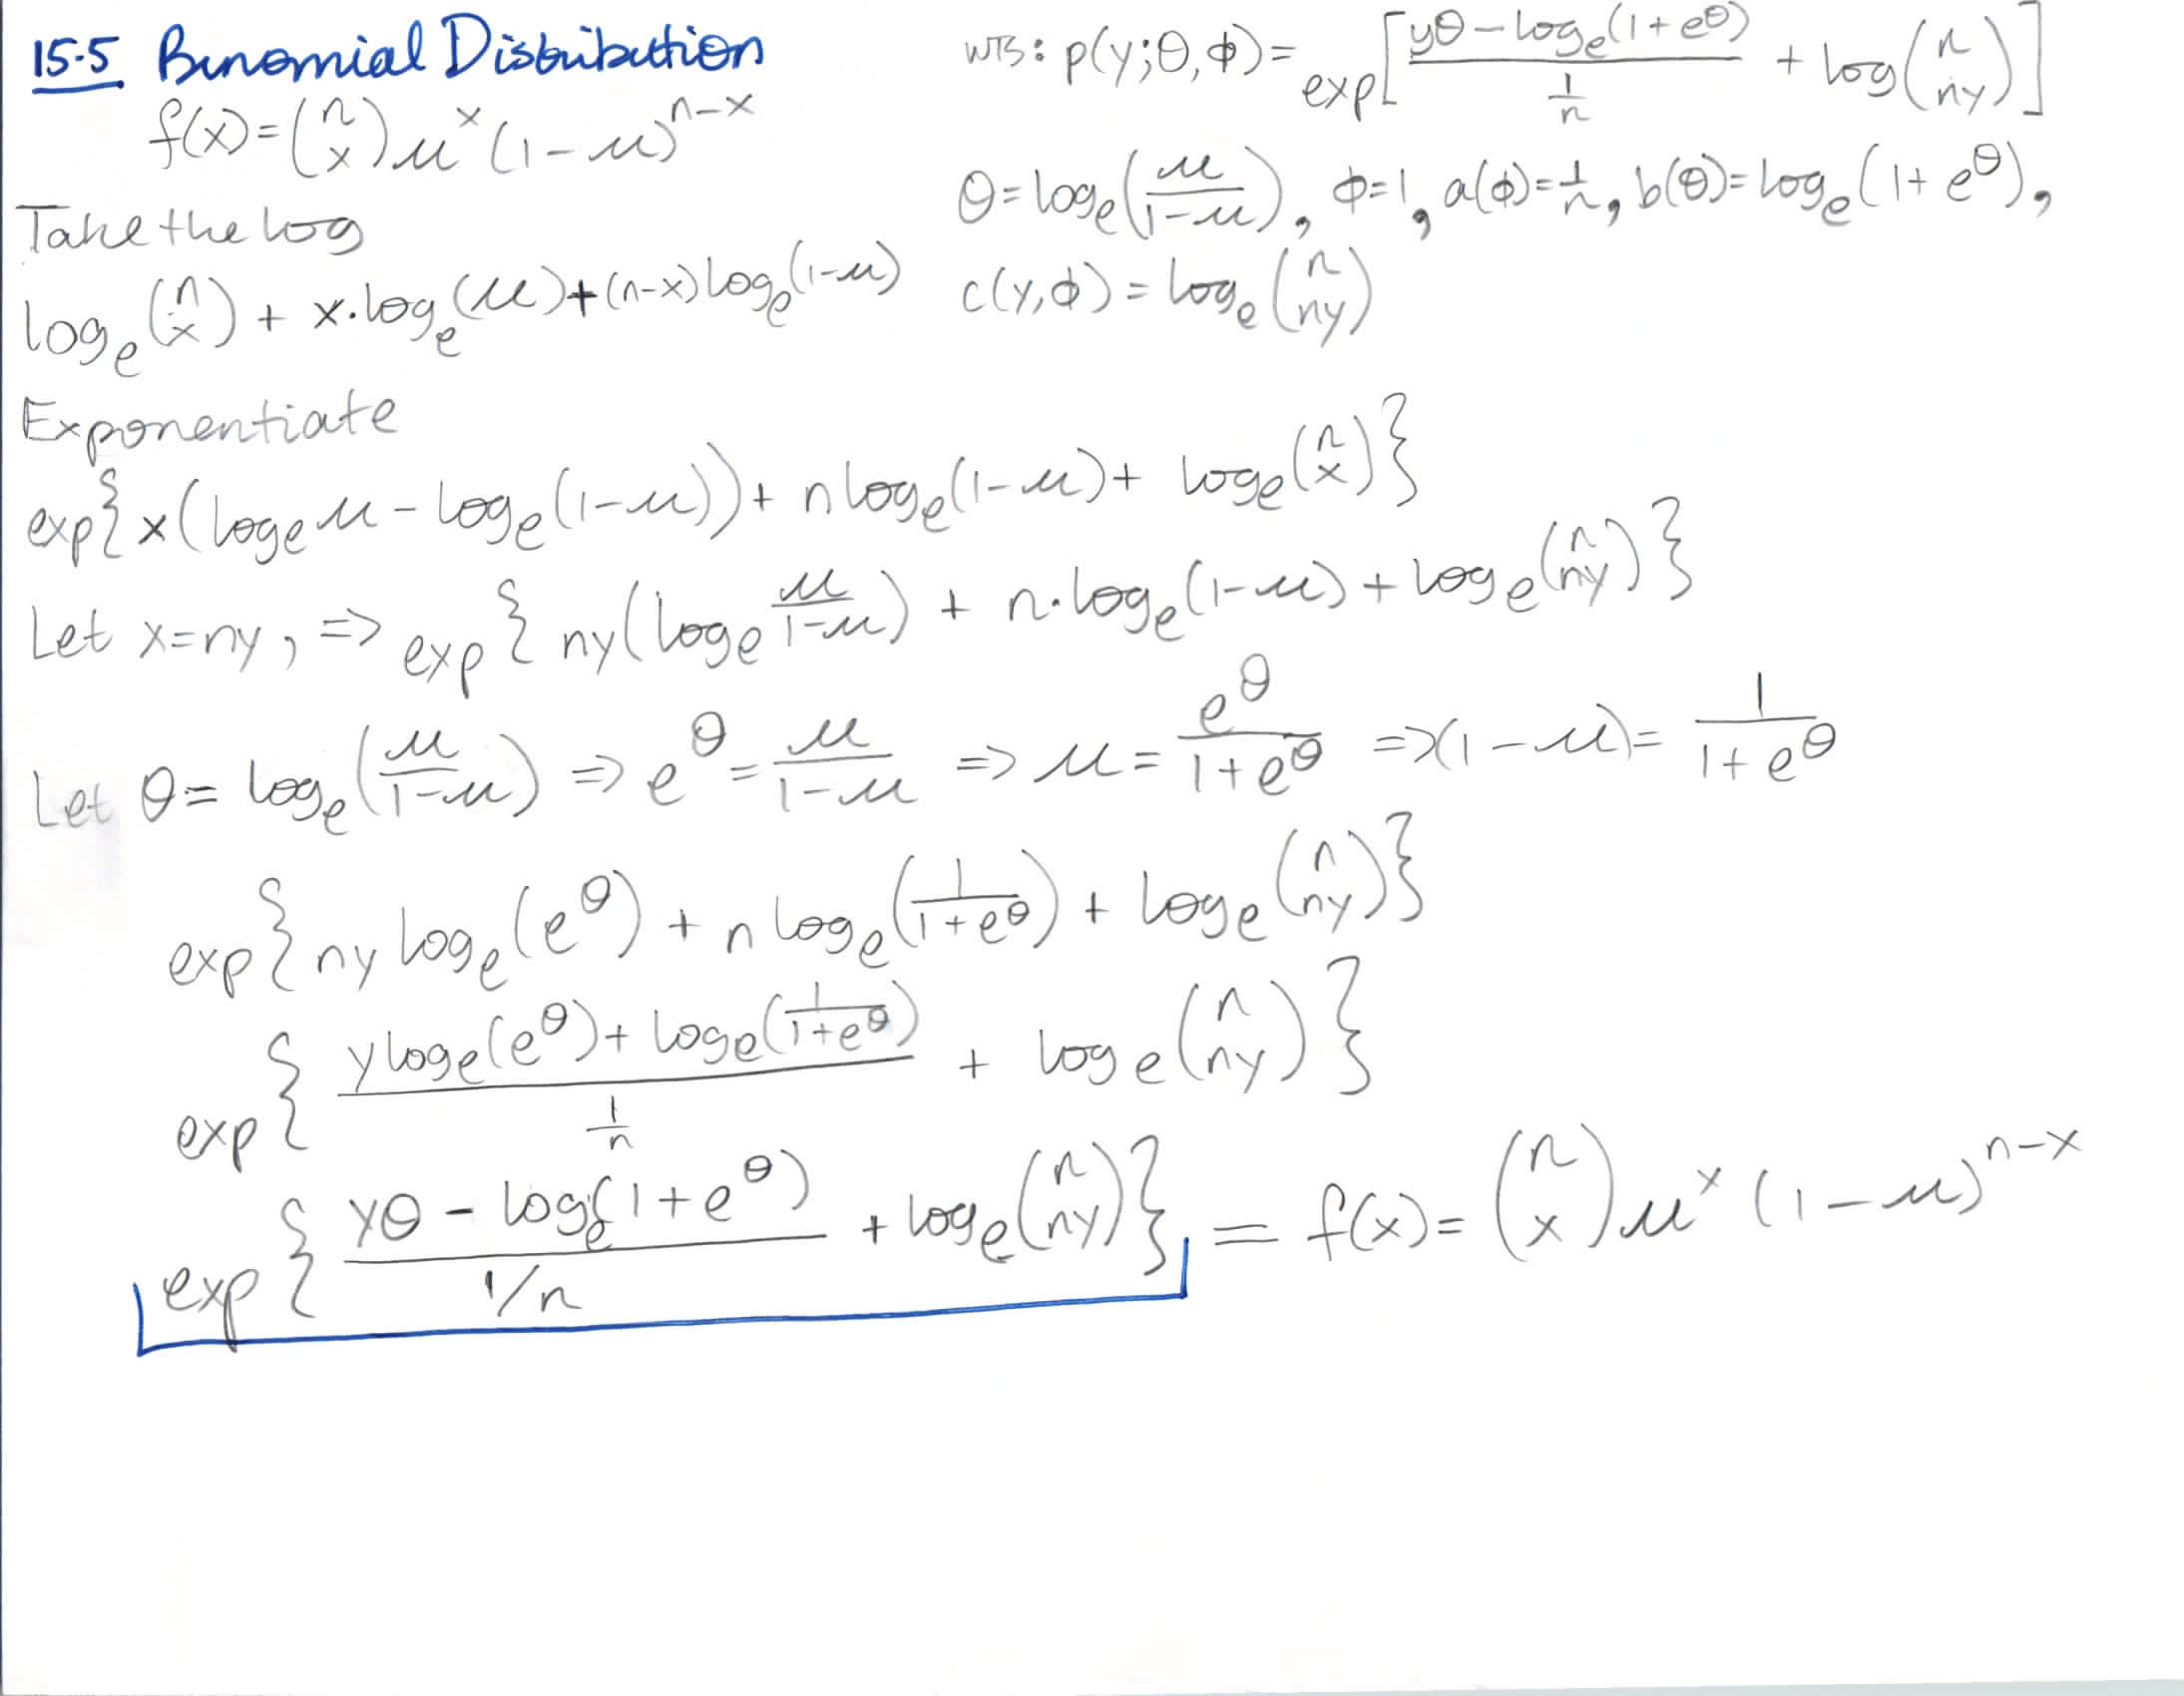

In [39]:
Image("4_20210719_0001-1.png", width=900, height=500)